<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/Eager_optimising_basketball_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse is my basketbal shot

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

In [3]:
# download my basketball shot data
!wget https://github.com/ZackAkil/optimising-basketball/raw/master/my_shot.npy

--2018-12-04 10:32:58--  https://github.com/ZackAkil/optimising-basketball/raw/master/my_shot.npy
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/my_shot.npy [following]
--2018-12-04 10:32:58--  https://raw.githubusercontent.com/ZackAkil/optimising-basketball/master/my_shot.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875128 (855K) [application/octet-stream]
Saving to: ‘my_shot.npy.1’

my_shot.npy.1       100%[===================>] 854.62K  --.-KB/s    in 0.04s   

2018-12-04 10:32:59 (19.4 MB/s) - ‘my_shot.npy.1’ saved [875128/875128]


In [0]:
# load in data
shot_data = np.load('my_shot.npy')

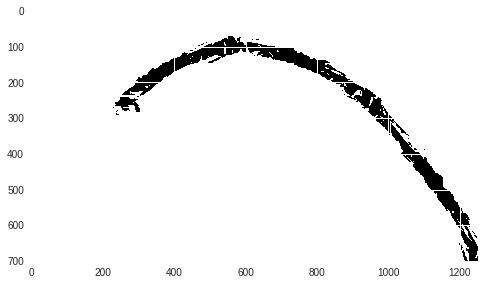

In [5]:
# view data
plt.imshow(shot_data)

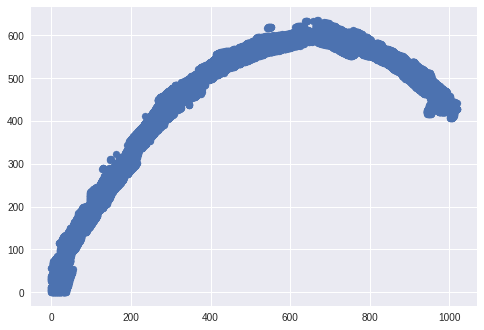

In [8]:
# convert pixels to data points, flip vertically and horizontally 
y, x = np.where(shot_data[::-1, ::-1])

# display
plt.scatter(x,y)

# Define Tensorflow Model

### The varibles that TensorFlow will change

In [0]:
angle_variable = tf.Variable(40.0, name='angle_constant')
force_variable = tf.Variable(50.0, name='force_constant')

my_variables = [angle_variable, force_variable]

### The formula 

http://www.softschools.com/formulas/physics/trajectory_formula/162/

 <img src="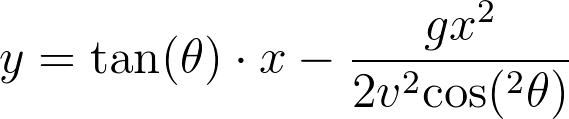
">

In [0]:
def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

def run_model(x):
  tf_lhs = x * tf.tan(deg2rad(angle_variable))
  tf_rhs_top = 9.8 * x ** 2
  tf_rhs_bottom = (2*(force_variable)**2) * (tf.cos( deg2rad(angle_variable))**2)
  output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
  return output

### What does the model look like with the default values compaired to our data?




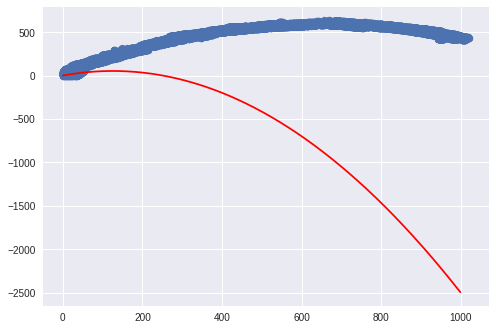

In [12]:
plt.scatter(x, y)
plt.plot(np.arange(1000), run_model(np.arange(1000)),c='r')
plt.show()

In [0]:
optimiser = tf.train.AdamOptimizer(learning_rate=1)

In [19]:
for i in range(500):

  with tf.GradientTape() as tape:
    loss = tf.losses.mean_squared_error(y, run_model(x))

  grads = tape.gradient(loss, my_variables)
  optimiser.apply_gradients(zip(grads, my_variables))

  # print values every 5 loops
  if (i % 5) == 0:
    print(my_variables[0].numpy() , my_variables[1].numpy())

52.593914 102.279015
53.233223 103.19892
53.831444 104.096725
54.391697 104.97162
54.91694 105.82294
55.40989 106.6501
55.87301 107.45266
56.308468 108.23026
56.71815 108.9827
57.10369 109.70984
57.466496 110.41165
57.80779 111.088196
58.128643 111.7396
58.430035 112.36606
58.712845 112.967834
58.977894 113.545235
59.22598 114.09861
59.45786 114.62834
59.674274 115.13488
59.875954 115.618675
60.063606 116.08025
60.23793 116.520134
60.3996 116.93888
60.549282 117.33708
60.687614 117.715324
60.815224 118.07424
60.932713 118.41447
61.040665 118.736664
61.139652 119.04146
61.230213 119.32952
61.312878 119.60152
61.38815 119.8581
61.456516 120.09993
61.51845 120.32765
61.574394 120.5419
61.62479 120.74331
61.670048 120.9325
61.710564 121.11007
61.746716 121.27661
61.778854 121.4327
61.807327 121.57888
61.83245 121.71568
61.85453 121.84364
61.873844 121.96325
61.890656 122.07497
61.90522 122.17927
61.91776 122.276566
61.9285 122.3673
61.93763 122.451866
61.945335 122.53063
61.951775 122.6039

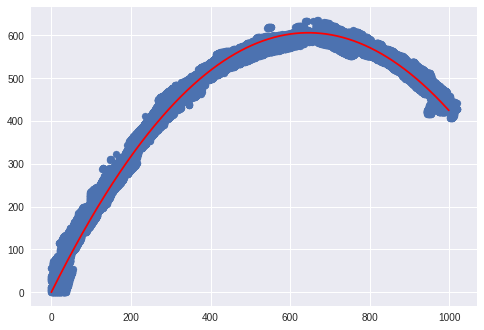

In [20]:
plt.scatter(x, y)
plt.plot(np.arange(1000), run_model(np.arange(1000)),c='r')
plt.show()